In [3]:
!pip install pandas matplotlib seaborn plotly


**Pandas:** For data manipulation and cleaning.

**Matplotlib and Seaborn:** For visualization.

**Plotly:** For interactive dashboard.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


Uploading my dataset to Google Colab and load it into a Pandas DataFrame.

In [5]:
from google.colab import files

uploaded=files.upload()

for filename in uploaded.keys():
  print(f'uploaded file: {filename}')

Saving shark_tank_cleaned.csv to shark_tank_cleaned.csv
uploaded file: shark_tank_cleaned.csv


In [6]:
# Load the dataset
df = pd.read_csv('shark_tank_cleaned.csv')  # Update the path to your dataset
df.head()  # View first 5 rows to check if the data is loaded correctly


,Season Number,Season Start,Season End,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,...,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount
0,1,20-12-2021,04-02-2022,1,Badlegi Business Ki Tasveer,1,BluePineFoods,Food,Frozen Momos,3,...,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20-12-2021,04-02-2022,1,Badlegi Business Ki Tasveer,2,BoozScooters,Vehicles/Electrical Vehicles,Renting e-bike for mobility in private spaces,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,20-12-2021,04-02-2022,1,Badlegi Business Ki Tasveer,3,HeartUpMySleeves,Beauty/Fashion,Detachable Sleeves,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,20-12-2021,04-02-2022,2,"Insaan, Ideas Aur Sapne",4,TagzFoods,Food,Healthy Potato Chips Snacks,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,20-12-2021,04-02-2022,2,"Insaan, Ideas Aur Sapne",5,HeadAndHeart,Education,Brain Development Course,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check for missing values


In [7]:
# Check for missing values
df.isnull().sum()


,0
Season Number,0
Season Start,0
Season End,0
Episode Number,0
Episode Title,0
Pitch Number,0
Startup Name,0
Industry,0
Business Description,0
Number of Presenters,0


Create a copy of dataframe and filling the missing values with 0

In [8]:
df_filled = df.copy()


In [9]:
df_filled.fillna(0, inplace=True)


In [10]:
df_filled.isnull().sum()  # To check if all missing values are filled


,0
Season Number,0
Season Start,0
Season End,0
Episode Number,0
Episode Title,0
Pitch Number,0
Startup Name,0
Industry,0
Business Description,0
Number of Presenters,0


Check and convert the data types as necessary.

In [11]:
# Convert relevant columns to numeric
df['Yearly Revenue'] = pd.to_numeric(df['Yearly Revenue'], errors='coerce')
df['Total Deal Amount'] = pd.to_numeric(df['Total Deal Amount'], errors='coerce')


organize by funding amount

In [12]:
# Create a new column to categorize the funding amount
def categorize_funding(x):
    if x < 500000:
        return 'Small'
    elif x < 5000000:
        return 'Medium'
    else:
        return 'Large'

df['Funding Category'] = df['Total Deal Amount'].apply(categorize_funding)


Analyze Founder Profiles

Index(['Season Number', 'Season Start', 'Season End', 'Episode Number',
       'Episode Title', 'Pitch Number', 'Startup Name', 'Industry',
       'Business Description', 'Number of Presenters', 'Male Presenters',
       'Female Presenters', 'Transgender Presenters', 'Couple Presenters',
       'Pitchers Average Age', 'Started in', 'Pitchers City', 'Pitchers State',
       'Yearly Revenue', 'Monthly Sales', 'Gross Margin', 'Net Margin',
       'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested',
       'Received Offer', 'Accepted Offer', 'Total Deal Amount',
       'Total Deal Equity', 'Total Deal Debt', 'Debt Interest',
       'Deal Valuation', 'Number of sharks in deal', 'Deal has conditions',
       'Has Patents', 'Ashneer Investment Amount', 'Ashneer Debt Amount',
       'Namita Investment Amount', 'Namita Investment Equity',
       'Namita Debt Amount', 'Anupam Investment Amount',
       'Anupam Investment Equity', 'Anupam Debt Amount',
       'Vineeta Investme

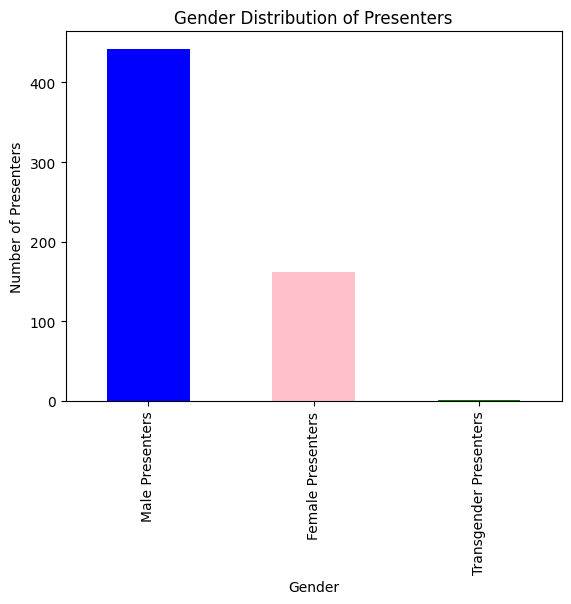

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv('shark_tank_cleaned.csv')  # Update the path to your dataset
df.head()  # View first 5 rows to check if the data is loaded correctly

# Check for missing values
df.isnull().sum()

# Create a copy of dataframe and filling the missing values with 0
df_filled = df.copy()

df_filled.fillna(0, inplace=True)

df_filled.isnull().sum()  # To check if all missing values are filled


# Check and convert the data types as necessary.
df['Yearly Revenue'] = pd.to_numeric(df['Yearly Revenue'], errors='coerce')
df['Total Deal Amount'] = pd.to_numeric(df['Total Deal Amount'], errors='coerce')


# organize by funding amount
# Create a new column to categorize the funding amount
def categorize_funding(x):
    if x < 500000:
        return 'Small'
    elif x < 5000000:
        return 'Medium'
    else:
        return 'Large'

df['Funding Category'] = df['Total Deal Amount'].apply(categorize_funding)


# Analyze Founder Profiles
# Plot the gender distribution of presenters
# Check the actual column names in your DataFrame
print(df_filled.columns)  # Print the columns to see the actual names

# Use the original column names directly from CSV for gender_counts
gender_counts = df_filled[['Male Presenters', 'Female Presenters', 'Transgender Presenters']].sum()

gender_counts.plot(kind='bar', color=['blue', 'pink', 'green'])
plt.title('Gender Distribution of Presenters')
plt.xlabel('Gender')
plt.ylabel('Number of Presenters')
plt.show()




Age Distribution of Founders

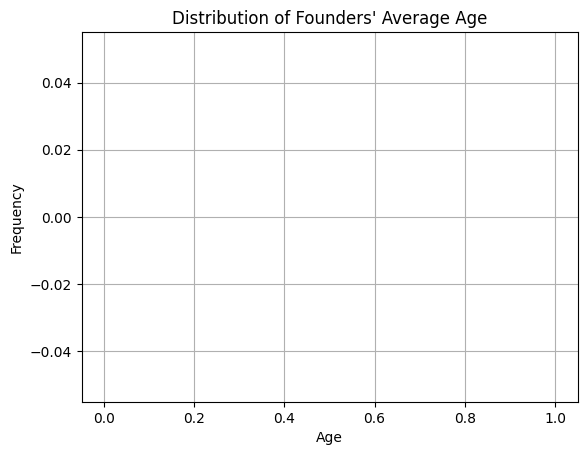

In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv('shark_tank_cleaned.csv')  # Update the path to your dataset
df.head()  # View first 5 rows to check if the data is loaded correctly

# ... (Rest of your code for data cleaning and preparation) ...

# Plot the distribution of the age of founders
df['Pitchers Average Age'].dropna().plot(kind='hist', bins=20, color='skyblue')
plt.title("Distribution of Founders' Average Age")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Analyze Funding Stage Success

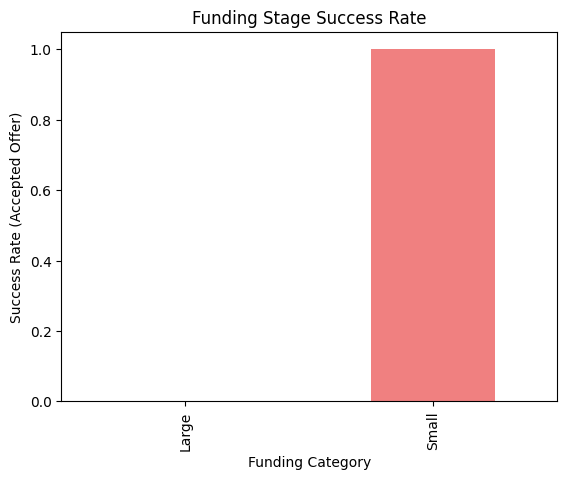

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv('shark_tank_cleaned.csv')  # Update the path to your dataset
df.head()  # View first 5 rows to check if the data is loaded correctly

# ... (Rest of your code for data cleaning and preparation) ...

# Assuming 'Funding Category' is created in a previous cell,
# you need to bring that logic into this cell as well.

# Check and convert the data types as necessary.
df['Yearly Revenue'] = pd.to_numeric(df['Yearly Revenue'], errors='coerce')
df['Total Deal Amount'] = pd.to_numeric(df['Total Deal Amount'], errors='coerce')

# organize by funding amount
# Create a new column to categorize the funding amount
def categorize_funding(x):
    if x < 500000:
        return 'Small'
    elif x < 5000000:
        return 'Medium'
    else:
        return 'Large'

df['Funding Category'] = df['Total Deal Amount'].apply(categorize_funding) # This line creates the 'Funding Category' column


# Now you can group by 'Funding Category'
# Group by funding category and check success rate
success_rate = df.groupby('Funding Category')['Accepted Offer'].mean()

# Plot the success rate by funding category
success_rate.plot(kind='bar', color='lightcoral')
plt.title('Funding Stage Success Rate')
plt.xlabel('Funding Category')
plt.ylabel('Success Rate (Accepted Offer)')
plt.show()

 Analyze Deals by Industry

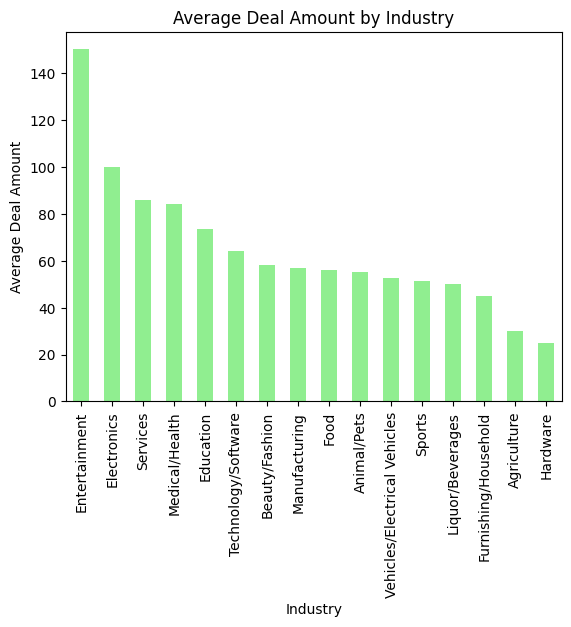

In [17]:
# Group by industry and calculate average deal amount
industry_performance = df.groupby('Industry')['Total Deal Amount'].mean()

# Plot industry performance
industry_performance.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Average Deal Amount by Industry')
plt.xlabel('Industry')
plt.ylabel('Average Deal Amount')
plt.show()


 Interactive Funding Success Rate by Category

In [18]:
# Create an interactive plot for funding success rate
fig = px.bar(success_rate, x=success_rate.index, y=success_rate.values, labels={'x': 'Funding Category', 'y': 'Success Rate'},
             title='Funding Stage Success Rate')
fig.show()


In [19]:
# Interactive bar chart for Industry performance
fig = px.bar(industry_performance.sort_values(ascending=False).reset_index(), x='Industry', y='Total Deal Amount',
             title='Average Deal Amount by Industry', labels={'Industry': 'Industry', 'Total Deal Amount': 'Average Deal Amount'})
fig.show()
